In [12]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [2]:
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [3]:
penguins.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


In [18]:
pen_train, pen_test = train_test_split(penguins, test_size=0.3, random_state=42, stratify=penguins['island'])
print(pen_train.shape, pen_test.shape)

(233, 7) (100, 7)


In [19]:
features= ['flipper_length_mm', 'bill_depth_mm'] 
dt_regression = DecisionTreeRegressor(max_depth = 5) 
dt_regression.fit(pen_train[features], pen_train['body_mass_g'])

DecisionTreeRegressor(max_depth=5)

Do I expect a diffrence between RMSE's?
    - Yes, The training pool is larger, so should give a more accurate prediction, having a smaller number

In [20]:
predictionsOnTrainset = dt_regression.predict(pen_train[features])
predictionsOnTestset = dt_regression.predict(pen_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, pen_train.body_mass_g)
rmseTest = calculate_rmse(predictionsOnTestset, pen_test.body_mass_g)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 273.2408734596574
RMSE on test set 395.78134639309513


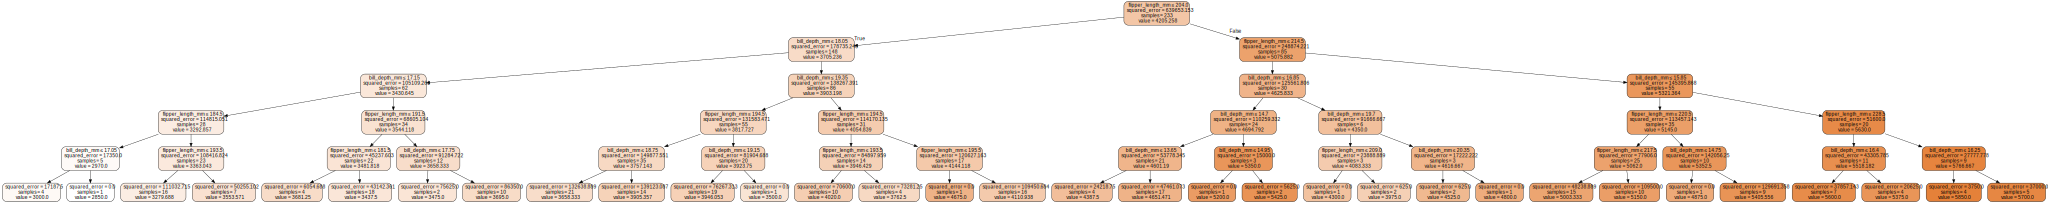

In [21]:
plot_tree_regression(dt_regression, features)